In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [6]:
#Read in data
df = pd.read_csv("reddit_feature_temp.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,text,positive_words,negative_words
0,0,0,What kind of phone(s) do you guys have?,0,0
1,1,1,I have a pixel. It's pretty great. Much better...,2,0
2,2,2,Does it really charge all the way in 15 min?,0,0
3,3,4,Samsung Galaxy J1. It's my first cell phone an...,0,0
4,4,5,What do you think of it? Anything you don't like?,0,0


# Some extra cleaning. Replacing html ampersand codes.
from w3lib.html import replace_entities
df["text"] = df["text"].astype(str)
df["text"] = df["text"].apply(replace_entities)

# Positive/Negative Word Counts
Positive and negative word lists pulled from https://ptrckprry.com/course/ssd/data/positive-words.txt
and https://ptrckprry.com/course/ssd/data/negative-words.txt
respectively.

First we read in the word lists and set up functions that will count their occurences.

In [6]:
with open("../twitter_stream/wordLists/positive_words.txt",'r') as file:
    positive_words = file.read().splitlines()

with open("../twitter_stream/wordLists/negative_words.txt",'r') as file:
    negative_words = file.read().splitlines()

In [7]:
print(len(positive_words))
print(len(negative_words))

2006
4783


In [8]:
#Functions that count the occurences of positive/negative words in a text string
def count_positive(text):
    counter = 0
    for word in positive_words:
        counter += text.lower().split().count(word)
    return counter
def count_negative(text):
    counter = 0
    for word in negative_words:
        counter += text.lower().split().count(word)
    return counter

We create the new features (this takes a minute to run)

In [9]:
df["positive_words"] = df["0"].apply(count_positive)

In [11]:
df["negative_words"] = df["0"].apply(count_negative)

Look at some stats

In [9]:
df.positive_words.describe()

count    218167.000000
mean          0.390426
std           0.657715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: positive_words, dtype: float64

In [10]:
df.positive_words.describe()

count    218167.000000
mean          0.390426
std           0.657715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: positive_words, dtype: float64

What are the most positive and negative tweets?

In [4]:
most_positive = df["positive_words"].argmax()

In [7]:
print(df.iloc[most_positive].text)
print(df.iloc[most_positive].positive_words)

Cool cool cool cool cool cool cool cool.
7


In [8]:
most_negative = df["negative_words"].argmax()

In [9]:
print(df.iloc[most_negative].text)
print(df.iloc[most_negative].negative_words)

Fuck fuck fuck fuck fuck fuck fuck fuck motherfuck motherfuck motherfuck fuck noise noise noise
12


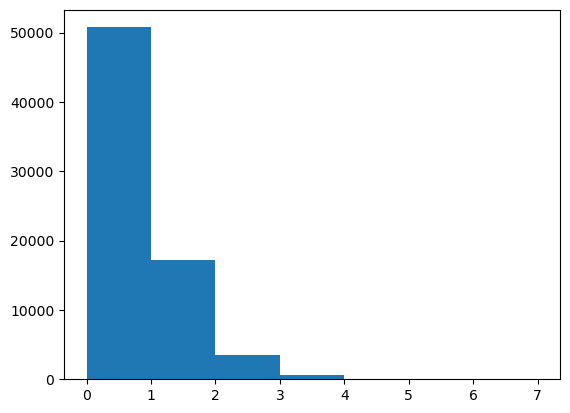

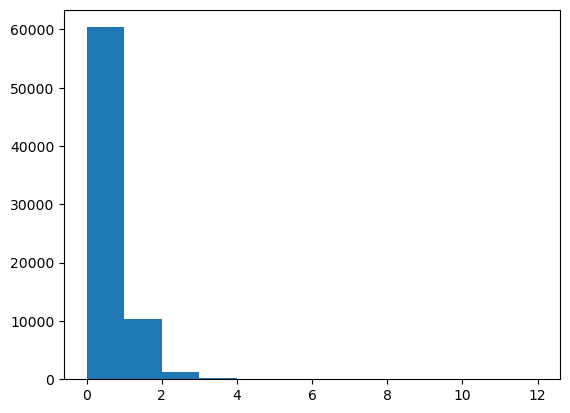

In [10]:
plt.hist(df.positive_words, bins = df.positive_words.max())
plt.show()
plt.hist(df.negative_words, bins = df.negative_words.max())
plt.show()

# Text Length

In [11]:
df["length"] = df["text"].apply(len)
df["word_count"] = df["text"].apply((lambda s:len(s.split())))

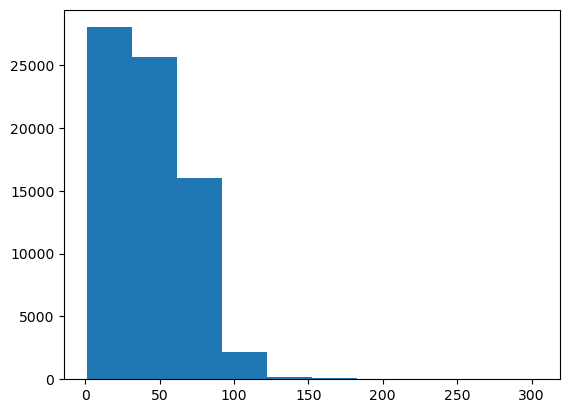

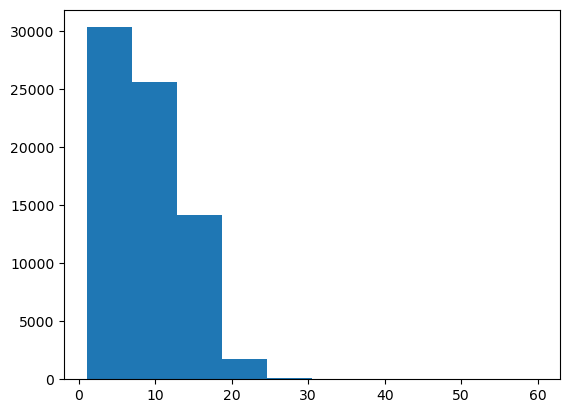

In [12]:
plt.hist(df["length"])
plt.show()
plt.hist(df["word_count"])
plt.show()

# Male and Female words
Word lists adapted from https://github.com/DanielleSucher/Jailbreak-the-Patriarchy/blob/master/myscript.js

In [14]:
with open("../twitter_stream/wordLists/male_words", 'r') as file:
    male_words = file.read().splitlines()

In [15]:
with open("../twitter_stream/wordLists/female_words", 'r') as file:
    female_words = file.read().splitlines()

In [16]:
def count_male(text):
    counter = 0
    for word in male_words:
        counter += text.lower().split().count(word)
    return counter
def count_female(text):
    counter = 0
    for word in female_words:
        counter += text.lower().split().count(word)
    return counter

In [17]:
df["male_words"] = df["text"].apply(count_male)

In [18]:
df["female_words"] = df["text"].apply(count_female)

In [19]:
df["male_words"].describe()

count    72135.000000
mean         0.073141
std          0.388692
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: male_words, dtype: float64

In [20]:
df["female_words"].describe()

count    72135.000000
mean         0.046718
std          0.333659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: female_words, dtype: float64

What are the most male and female tweets in the dataset?

In [21]:
df.iloc[df["female_words"].argmax()].text

'Today on the bus there was a transgender woman and a lady literally moved seats to not have to sit next to her. So I moved seats to sit next to her. She realized that woman moved seats to avoid her and I could tell she was hurt.'

In [22]:
df.iloc[df["male_words"].argmax()].text

'I texted my husband after my afternoon hike to see if he wanted Chipotle. He called me right after he got my text to let me know he was already in the parking lot and was just about to call and see if I wanted anything. So we ended up just meeting at Chipotle and eating together. It was nice.'

# Sentiment analysis scores from Afinn

In [24]:
from afinn import Afinn
afinn = Afinn(language='en')
df["afinn"] = df["text"].apply(afinn.score)

In [25]:
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,text,positive_words,negative_words,length,word_count,male_words,female_words,afinn
3955,3955,5969,whatdja major in?,0,0,17,3,0,0,0.0
66020,66020,40104,Ive tripped like crazy on an 8th before,1,1,39,8,0,0,0.0
5705,5705,8547,where he said,0,0,13,3,2,0,0.0
3374,3374,5126,What are you giving up/challenging yourself to...,0,0,82,14,0,0,0.0
52913,52913,1365,"I'm with you there,_,",0,0,21,4,0,0,0.0
45266,45266,32642,Goddamnit. No.,0,0,14,2,0,0,-1.0
60270,60270,24177,"Haha so why do you ""farm"" karma? And what make...",0,0,63,14,0,0,6.0
36615,36615,4060,"If you ever need an ear, I am here. I have wor...",1,1,83,17,0,0,0.0
18315,18315,27674,Sounds like you might wanna get high,1,0,36,7,0,0,2.0
13695,13695,20446,I validate this comment,0,0,23,4,0,0,1.0


In [27]:
df["a"]

KeyError: 'a'

# Save the resulting Dataframe!

In [26]:
df.to_csv("reddit_with_features.csv")